<font size=6>K近邻法(KNN)算法</font>
# 概述
## K近邻法(k-nearest neighbors,KNN)：
1. 基本的监督学习方法；
2. 既可以做分类，也可以做回归；
3. 通俗原理：近朱者赤近墨者黑；

## KNN做回归和分类的主要区别在于最后做预测时候的决策方式不同
1. KNN做分类预测时，一般是选择多数表决法，即训练集里和预测的样本特征最近的K个样本，预测为里面有最多类别数的类别；
2. KNN做回归时，一般是选择平均法，即最近的K个样本的样本输出的平均值作为回归预测值；

## KNN在scikit-learn中的实现方式
1. 蛮力实现(brute-force)；
2. KD树实现(KDTree)；
3. 球树(BallTree)；

**其他实现方式：**BBF树，MVP树等；

# KNN算法三要素
1. k值的选取
2. 距离度量的方式
3. 分类决策规则

## k值的选取
对于k值的选择，没有一个固定的经验，一般根据样本的分布，选择一个较小的值，可以通过交叉验证选择一个合适的k值。

选择较小的k值，就相当于用较小的领域中的训练实例进行预测，训练误差会减小，只有与输入实例较近或相似的训练实例才会对预测结果起作用，与此同时带来的问题是泛化误差会增大，换句话说，K值的减小就意味着整体模型变得复杂，容易发生过拟合；

选择较大的k值，就相当于用较大领域中的训练实例进行预测，其优点是可以减少泛化误差，但缺点是训练误差会增大。这时候，与输入实例较远（不相似的）训练实例也会对预测起作用，使预测发生错误，且K值的增大就意味着整体的模型变得简单。


一个极端是k等于样本数m，则完全没有分类，此时无论输入实例是什么，都只是简单的预测它属于在训练实例中最多的类，模型过于简单。
## 距离度量的方式
闵可夫斯基距离(Minkowski Distance)，定义为：
$$\large D(x,y) =\sqrt[p]{(|x_1-y_1|)^p + (|x_2-y_2|)^p + ... + (|x_n-y_n|)^p} =\sqrt[p]{\sum\limits_{i=1}^{n}(|x_i-y_i|)^p}$$

当p=1时，又叫曼哈顿距离；

当p=2时，又叫欧式距离（比较常用）；
## 分类决策规则
一般都是使用前面提到的多数表决法

# 蛮力实现
## 原理
1. 假设有一个带有标签的样本数据集（训练样本集），其中包含每条数据与所属分类的对应关系。
2. 输入没有标签的新数据后，将新数据的每个特征与样本集中数据对应的特征进行比较。
    1. 计算新数据与样本数据集中每条数据的距离。
    2. 对求得的所有距离进行排序（从小到大，越小表示越相似）。
    3. 取前 k （k 一般小于等于 20 ）个样本数据对应的分类标签。
3. 求 k 个数据中出现次数最多的分类标签作为新数据的分类。

## 总结
该方法简单直接，在样本量少，样本特征少的时候有效。

但是碰到样本的特征数有上千以上，样本量有几十万以上，预测少量的测试集样本，这时候，算法的时间效率很成问题。

# KD树实现
KD树算法包括三步：
1. 第一步是建树；
2. 第二步是搜索最近邻；
3. 最后一步是预测。

## KD树的建立
KD树建树采用的是从$m$个样本的$n$维特征中，分别计算$n$个特征的取值的方差，用方差最大的第$k$维特征$n_k$来作为根节点。对于这个特征，我们选择特征$n_k$的取值的中位数$n_{kv}$对应的样本作为划分点，对于所有第k维特征的取值小于$n_{kv}$的样本，我们划入左子树，对于第$k$维特征的取值大于等于$n_{kv}$的样本，我们划入右子树，对于左子树和右子树，我们采用和刚才同样的办法来找方差最大的特征来做根节点，递归的生成KD树。

具体流程如下图：
<img src="images/1042406-20161114150258701-1426435920.jpg">

### 例
比如我们有二维样本6个，{(2,3)，(5,4)，(9,6)，(4,7)，(8,1)，(7,2)}，构建kd树的具体步骤为：
1. 找到划分的特征。6个数据点在x，y维度上的数据方差分别为6.97，5.37，所以在x轴上方差更大，用第1维特征建树。
2. 确定划分点(7,2)。根据x维上的值将数据排序，6个数据的中值为7，所以划分点的数据是（7,2）。这样，该节点的分割超平面就是通过（7,2）的直线x=7；
3. 确定左子空间和右子空间。 分割超平面x=7将整个空间分为两部分：x<7的部分为左子空间，包含3个节点={(2,3),(5,4),(4,7)}；另一部分为右子空间，包含3个节点={(7,2)，(9,6)，(8,1)}。
4. 用同样的办法划分左子树的节点{(2,3),(5,4),(4,7)}和右子树的节点{(7,2)，(9,6)，(8,1)}。最终得到KD树。

<img src="images/1042406-20161114151317201-1936126361.jpg">

## KD树搜索最近邻
对于一个目标点(测试数据)，搜索流程：
1. 首先在KD树里面找到包含目标点的叶子节点；
2. 以目标点为圆心，以目标点到叶子节点样本实例的距离为半径，得到一个超球体，最近邻的点一定在这个超球体内部；
3. 返回叶子节点的父节点，检查另一个子节点包含的超矩形体是否和超球体相交；
    1. 如果相交就到这个子节点寻找是否有更加近的近邻,有的话就更新最近邻；
    2. 如果不相交那就简单了，我们直接返回父节点的父节点，在另一个子树继续搜索最近邻；
4. 当回溯到根节点时，算法结束，此时保存的最近邻节点就是最终的最近邻。

KD树划分后可以大大减少无效的最近邻搜索，很多样本点由于所在的超矩形体和超球体不相交，根本不需要计算距离。大大节省了计算时间。

### 例
我们用上面建立KD树的例子，来看测试数据（目标点）**(2,4.5)**找最近邻的过程:
1. 确定叶子节点：<(7,2)，(5,4)，(4,7)>
2. 获取超球体，得到最近邻为(2,3)叶子节点
3. 向上回溯父节点<(2,3),(5,4),(7,2)>
4. 确定第一个最近邻点为（2,3）

<img src="images/1042406-20161114165145763-428195796.jpg">

## KD树预测
根据上面搜索到的K个最近邻，按照多数表决法：
1. 如果是KNN分类，预测为K个最近邻里面有最多类别数的类别；
2. 如果是KNN回归，用K个最近邻样本输出的平均值作为回归预测值；

# KNN球树实现
KD树算法虽然提高了KNN搜索的效率，但是在某些时候效率并不高，比如当处理不均匀分布的数据集时,不管是近似方形，还是矩形，甚至正方形，都不是最好的使用形状，因为他们都有角。

**例如：**
<img src="images/1042406-20161114171107045-1904406302.jpg">
如果黑色的实例点离目标点星点再远一点，那么虚线圆会如红线所示那样扩大，导致与左上方矩形的右下角相交，既然相 交了，那么就要检查这个左上方矩形，而实际上，最近的点离星点的距离很近，检查左上方矩形区域已是多余。

球树建树可以优化这种问题。
## 球树的建立
球树，顾名思义，就是每个分割块都是超球体，而不是KD树里面的超矩形体。
<img src="images/1042406-20161114172004185-213758204.jpg">

**建树流程：**
1. 先构建一个超球体，这个超球体包含所有样本的最小球体；
2. 从球中选择一个离球的中心最远的点，然后选择第二个点离第一个点最远，将球中所有的点分配到离这两个聚类中心最近的一个上，然后计算每个聚类的中心，以及聚类能够包含它所有数据点所需的最小半径。这样我们得到了两个子超球体，这和KD树里面的左右子树对应；
3. 对于这两个子超球体，递归执行步骤2；最终得到球树；

## 球树搜索最近邻
**流程：**
1. 首先自上而下贯穿整棵树找出包含目标点所在的叶子，并在这个球里找出与目标点最邻近的点，这将确定出目标点距离它的最近邻点的一个上限值；
2. 跟KD树查找一样，检查兄弟结点：
    1. 如果目标点到兄弟结点中心的距离超过兄弟结点的半径与当前的上限值之和，那么兄弟结点里不可能存在一个更近的点；
    2. 否则的话，必须进一步检查位于兄弟结点以下的子树；
3. 检查完兄弟节点后，我们向父节点回溯，继续搜索最小邻近值。当回溯到根节点时，此时的最小邻近值就是最终的搜索结果；

**特点：**

KD树在搜索路径优化时使用的是两点之间的距离来判断，而球树使用的是两边之和大于第三边来判断，相对来说球树的判断更加复杂，但是却避免了更多的搜索，这是一个权衡。

# KNN算法的扩展
## 限定半径
样本中某系类别的样本非常的少，甚至少于K，这导致稀有类别样本在找K个最近邻的时候，会把距离其实较远的其他样本考虑进来，而导致预测不准确。为了解决这个问题，我们限定最近邻的一个最大距离，也就是说，我们只在一个距离范围内搜索所有的最近邻，这个距离我们一般称为限定半径。
## 质心算法
质心算法比KNN还简单。它首先把样本按输出类别归类。对于第$L$类的$C_l$个样本。它会对这$C_l$个样本的$n$维特征中每一维特征求平均值，最终该类别所有维度的$n$个平均值形成所谓的质心点。对于样本中的所有出现的类别，每个类别会最终得到一个质心点。当我们做预测时，仅仅需要比较预测样本和这些质心的距离，最小的距离对于的质心类别即为预测的类别。

# KNN算法总结
## KNN的主要优点有：

1. 理论成熟，思想简单，既可以用来做分类也可以用来做回归
2. 可用于非线性分类
3. 训练时间复杂度比支持向量机之类的算法低，仅为O(n)
4. 和朴素贝叶斯之类的算法比，对数据没有假设，准确度高，对异常点不敏感
5. 由于KNN方法主要靠周围有限的邻近的样本，而不是靠判别类域的方法来确定所属类别的，因此对于类域的交叉或重叠较多的待分样本集来说，KNN方法较其他方法更为适合
6. 该算法比较适用于样本容量比较大的类域的自动分类，而那些样本容量较小的类域采用这种算法比较容易产生误分


## KNN的主要缺点有：

1. 计算量大，尤其是特征数非常多的时候
2. 样本不平衡的时候，对稀有类别的预测准确率低
3. KD树，球树之类的模型建立需要大量的内存
4. 使用懒散学习方法，基本上不学习，导致预测时速度比起逻辑回归之类的算法慢
5. 相比决策树模型，KNN模型可解释性不强


# scikit-learn 中KNN相关的类库
在scikit-learn 中，与近邻法这一大类相关的类库都在sklearn.neighbors包之中。
1. KNN分类树的类是KNeighborsClassifier
2. KNN回归树的类是KNeighborsRegressor
3. 限定半径最近邻分类树的类RadiusNeighborsClassifier
4. 限定半径最近邻回归树的类RadiusNeighborsRegressor
5. 最近质心分类算法NearestCentroid

**参数：**
1. n_neighbors：KNN中的K值
1. radius：限定半径最近邻法中的半径
1. weights：近邻权重
1. algorithm：KNN和限定半径最近邻法使用的算法
1. leaf_size：停止建子树的叶子节点阈值
1. metric：距离度量算法
1. p：距离度量附属参数
1. metric_params：距离度量其他附属参数
1. n_jobs：并行处理任务数
1. outlier_label：异常点类别选择

另外，几个在sklearn.neighbors包中但不是做分类回归预测的类也值得关注
1. kneighbors_graph类返回用KNN时和每个样本最近的K个训练集样本的位置；
2. radius_neighbors_graph返回用限定半径最近邻法时和每个样本在限定半径内的训练集样本的位置；
3. NearestNeighbors为无监督最近邻，它即可以返回用KNN时和每个样本最近的K个训练集样本的位置，也可以返回用限定半径最近邻法时和每个样本最近的训练集样本的位置，它常常用在聚类模型中；



# 使用KNeighborsClassifier做分类的实例

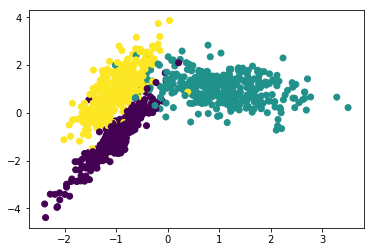

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets.samples_generator import make_classification
# X为样本特征，Y为样本类别输出， 共1000个样本，每个样本2个特征，输出有3个类别，没有冗余特征，每个类别一个簇
X, Y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                             n_clusters_per_class=1, n_classes=3,random_state=6)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y)
plt.show()

In [2]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors = 15 , weights='distance')
clf.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='distance')

Text(0.5, 1.0, "3-Class classification (k = 15, weights = 'distance')")

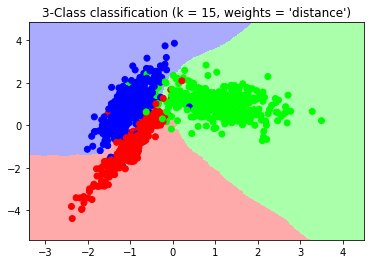

In [3]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#确认训练集的边界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#生成随机数据来做测试集，然后作预测
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# 画出测试集数据
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# 也画出所有的训练集数据
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = 15, weights = 'distance')" )